# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 0.3 * x

In [5]:
y_act = 5 + 0.3 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,3.293963,6.589655,5.988189
1,-0.448887,5.361807,4.865334
2,5.308787,6.825842,6.592636
3,1.056904,6.356673,5.317071
4,2.506200,4.207441,5.751860


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

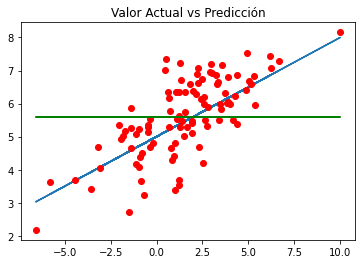

In [11]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [12]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.293963,6.589655,5.988189,0.145415,0.361761,0.965894
1,-0.448887,5.361807,4.865334,0.549856,0.246486,0.060049
2,5.308787,6.825842,6.592636,0.971762,0.054385,1.485927
3,1.056904,6.356673,5.317071,0.083975,1.080772,0.562225
4,2.506200,4.207441,5.751860,0.021026,2.385230,1.958362


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR

66.1988219900046

In [16]:
SSD

69.65678259753697

In [17]:
SST

138.37461036201884

In [18]:
SSR+SSD

135.85560458754156

In [19]:
R2 = SSR/SST

In [20]:
R2

0.47840295135656546

(array([ 3.,  1., 15., 16., 19., 20., 13.,  6.,  1.,  6.]),
 array([-2.18823557, -1.77862153, -1.36900748, -0.95939343, -0.54977939,
        -0.14016534,  0.2694487 ,  0.67906275,  1.0886768 ,  1.49829084,
         1.90790489]),
 <a list of 10 Patch objects>)

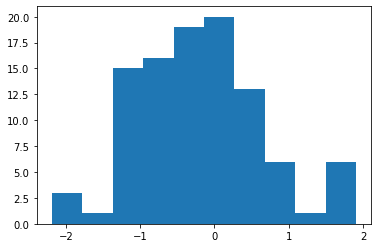

In [21]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [22]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4759408087358112, 5.606856212400784)

In [23]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [24]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [25]:
alpha = y_mean - beta * x_mean

In [26]:
alpha, beta

(5.136523104542086, 0.3186666464365553)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [27]:
data["y_model"] = alpha + beta * data["x"]

In [28]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.293963,6.589655,5.988189,0.145415,0.361761,0.965894,1.786750,3.305205,6.186199
1,-0.448887,5.361807,4.865334,0.549856,0.246486,0.060049,0.471678,3.704964,4.993478
2,5.308787,6.825842,6.592636,0.971762,0.054385,1.485927,4.672186,14.690710,6.828256
3,1.056904,6.356673,5.317071,0.083975,1.080772,0.562225,-0.314201,0.175592,5.473323
4,2.506200,4.207441,5.751860,0.021026,2.385230,1.958362,-1.441760,1.061434,5.935166


In [29]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [30]:
SSR, SSD, SST

(71.6557272095292, 66.71888315248972, 138.37461036201887)

In [31]:
R2 = SSR / SST
R2

0.5178386918095872

Text(0.5, 1.0, 'Valor Actual vs Predicción')

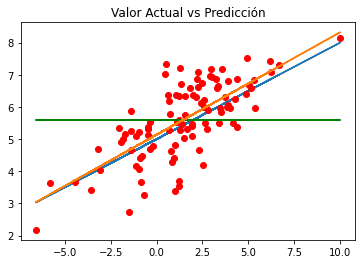

In [32]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [33]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8251090413560175

In [34]:
np.mean(data["y_actual"])

5.606856212400784

In [35]:
RSE / np.mean(data["y_actual"])

0.14716072788367734